In [1]:
import pandas as pd
import numpy as np
import os
import pickle
from kneed import KneeLocator
import matplotlib.pyplot as plt

In [4]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 寻找进样点

## 进样点筛选方法三（阈值）

In [25]:
path = './1121+1117混合数据/'
dog_list= os.listdir(path)
dog_list

['可乐_1121',
 '姜_1121',
 '柚子_1121',
 '柠檬_1121',
 '橙汁+苹果汁_1121',
 '洋葱_1121',
 '热咖啡_1121',
 '白酒_1117',
 '白醋_1117',
 '空_1121',
 '芒果_1121',
 '蒜_1121',
 '酱油_1117']

In [26]:
def get_knee_point(df):
    S_knee_list=['S1','S5','S7','S18'] #进样点选取传感器
    knee_points=[]
    for s in S_knee_list:
        df_new=df[s]-df[s].shift(2)
        df_list=df_new[df_new>0.015].index.tolist()
        if len(df_list)==0:
            knee_points.append(4)
        else:
            knee_poinst.append(df_list[0]-1)
            
    counts = np.bincount(knee_points)
    knee_point=np.argmax(counts)
    
    df_hum = df[]
    
    
    return knee_point

SyntaxError: invalid syntax (<ipython-input-26-75bf9d5d93ef>, line 15)

./1121+1117混合数据/可乐_1121
./1121+1117混合数据/姜_1121
./1121+1117混合数据/柚子_1121
./1121+1117混合数据/柠檬_1121
./1121+1117混合数据/橙汁+苹果汁_1121
./1121+1117混合数据/洋葱_1121
./1121+1117混合数据/热咖啡_1121
./1121+1117混合数据/白酒_1117
./1121+1117混合数据/白醋_1117
./1121+1117混合数据/空_1121
./1121+1117混合数据/芒果_1121
./1121+1117混合数据/蒜_1121
./1121+1117混合数据/酱油_1117


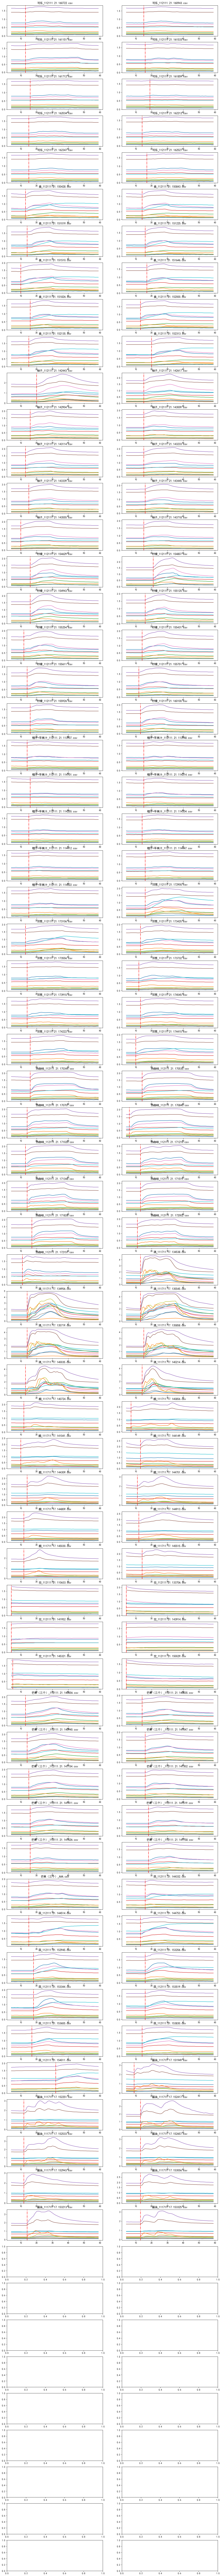

In [30]:
fig,axes = plt.subplots(70,2,figsize=(16,200)) 
S_knee_list=['S1','S5','S6','S18']
S_selected_list=['S1','S2','S3','S4','S5','S6','S7','S8','S15','S16','S17','S18']
n=0
for dog in dog_list:
    print(os.path.join(path,dog))
    idx_list = os.listdir(os.path.join(path,dog))
    for idx in idx_list:

        df = pd.read_csv(os.path.join(path,dog,idx), nrows=60,usecols=S_selected_list)[4:]
        df_hum  = pd.read_csv(os.path.join(path, dog, idx), nrows=60, usecols=['HUM'])[4:]
        
        #print(df)
        df.to_csv("shit.csv")
        knee_points=[]
        
        for s in S_knee_list:
    
            df_new=df[s]-df[s].shift(2)
            #print(df_new)
            df_list=df_new[df_new>0.015].index.tolist()
            if len(df_list)==0:
                knee_points.append(4)
            else:
                knee_points.append(df_list[0]-1)
            
        counts = np.bincount(knee_points)
        knee_point=np.argmax(counts)
        
        
        '''
        df_hum_new = df_hum['HUM']-df_hum['HUM'].shift(2)
        df_hum_list = df_hum_new[df_hum_new>0.6].index.tolist()
        if len(df_hum_list)!=0:
            knee_point = df_hum_list[0]
        '''    
    
        axes[n//2,n%2].plot (df)
        axes[n//2,n%2].axvline(x=knee_point,ls="-.",c="red")#添加垂直直线
        axes[n//2,n%2].set_title(idx)
        
        n+=1
plt.show()